In [123]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMportamos datos

In [124]:
sales_BR_df = pd.read_csv("precios_hogares.csv")
sales_BR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Visualizamos

eliminamos la columna string

In [125]:
sales_BR_df=sales_BR_df.drop(columns=['date'], axis=1)

Vemos la correlacion

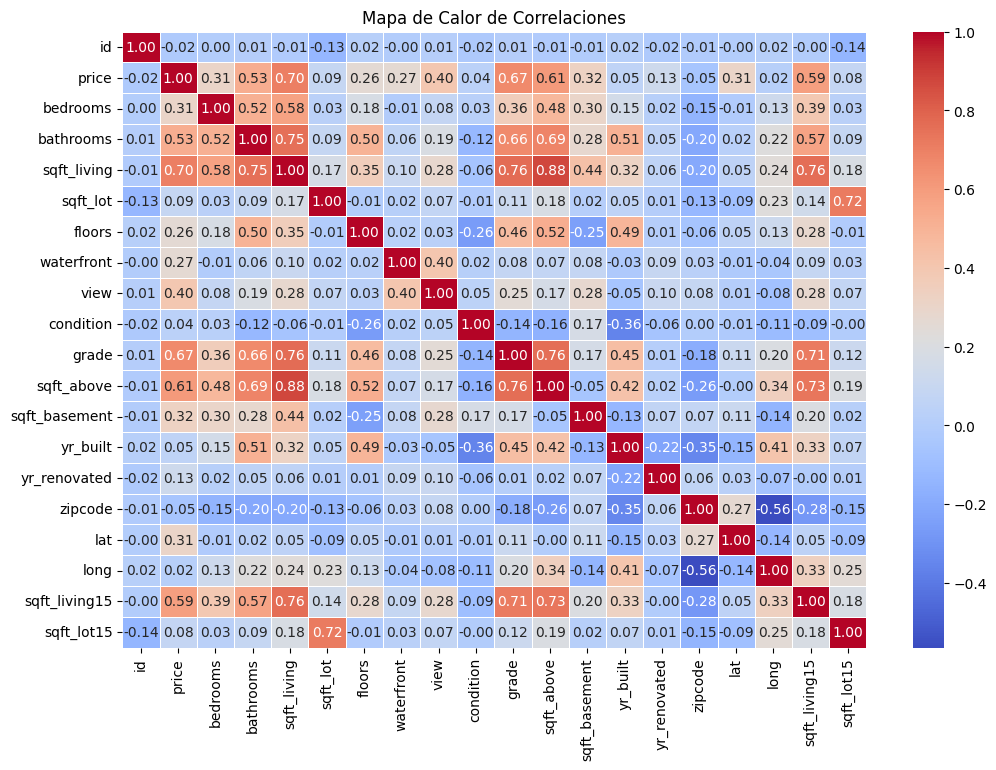

In [126]:
# Calcular la matriz de correlación
corr_matrix = sales_BR_df.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

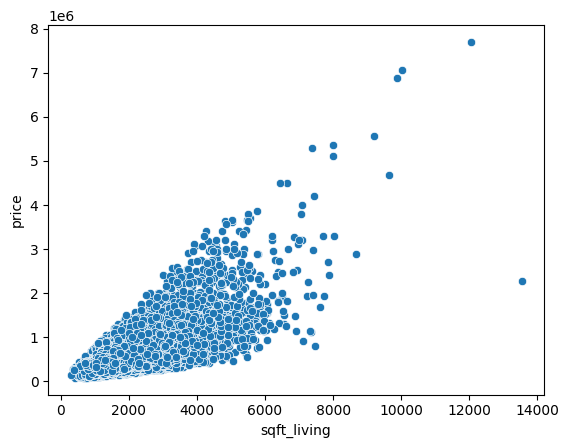

In [127]:
sns.scatterplot(x='sqft_living', y='price', data=sales_BR_df)

<Axes: xlabel='bathrooms', ylabel='price'>

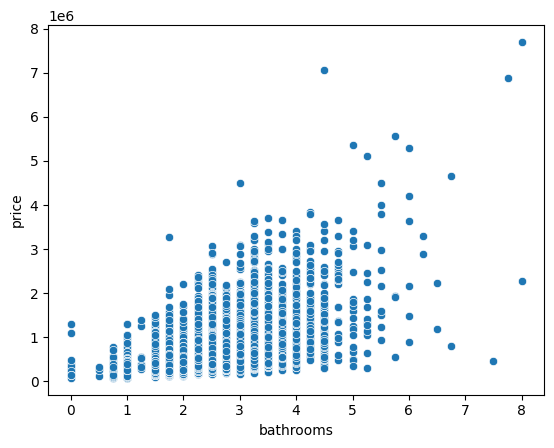

In [128]:
sns.scatterplot(x='bathrooms', y='price', data=sales_BR_df)

<Axes: xlabel='grade', ylabel='price'>

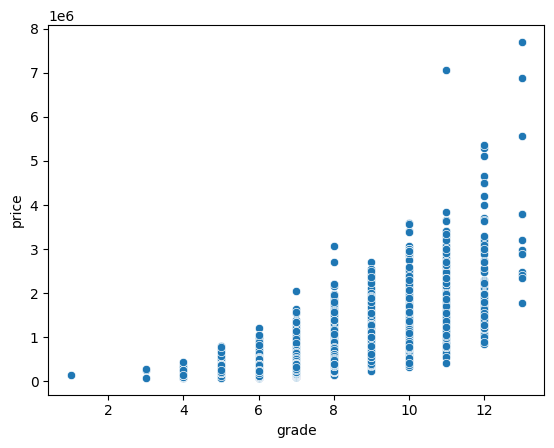

In [129]:
sns.scatterplot(x='grade', y='price', data=sales_BR_df)

<Axes: xlabel='sqft_above', ylabel='price'>

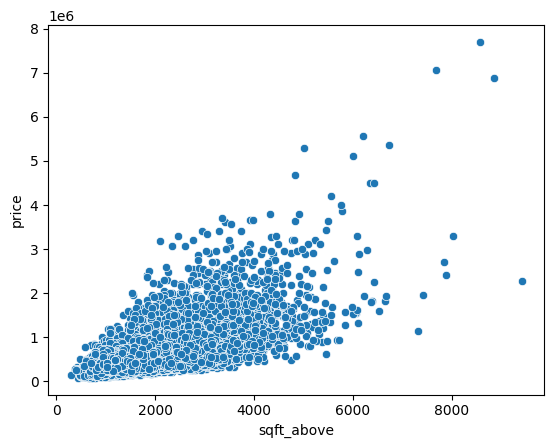

In [130]:
sns.scatterplot(x='sqft_above', y='price', data=sales_BR_df)

<Axes: xlabel='sqft_living15', ylabel='price'>

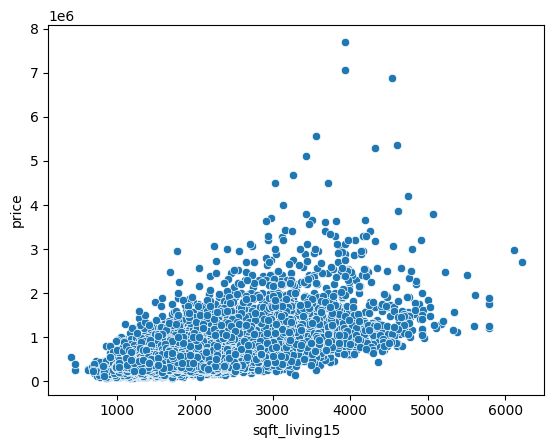

In [131]:
sns.scatterplot(x='sqft_living15', y='price', data=sales_BR_df)

Elegimos que features vamos a utilizar segun correlacion

In [132]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']

x = sales_BR_df[selected_features]
y = sales_BR_df['price']

In [133]:
x.head(100)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
95,4,2.50,3300,10250,1.0,2390,910
96,3,1.75,1960,15681,1.0,1960,0
97,4,1.50,1160,6400,1.0,1160,0
98,3,1.75,1810,41800,1.0,1210,600


Escqalamos los datos de x

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_scaled = MinMaxScaler()


Normalizamos output

In [135]:
y = y.values.reshape(-1,1)
y_scaled = scaler_y.fit_transform(y)

x_scaled = scaler_x.fit_transform(x)

Entrenamiento

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x_scaled, y_scaled, test_size=0.25)

Definiendo el modelo

In [137]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 100,activation='relu', input_shape = (7,)))
model.add(tf.keras.layers.Dense(units = 100,activation='relu'))
model.add(tf.keras.layers.Dense(units = 100,activation='relu'))
model.add(tf.keras.layers.Dense(units = 1,activation='linear'))

c:\Users\Nico\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

Compilamos el modelo

In [139]:
model.compile(optimizer='Adam', loss='mean_squared_error')

Entrenamos el modelo

In [140]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size= 50, validation_split= 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 9.7731e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8067e-04 - val_loss: 9.8098e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 9.5836e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 9.4853e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8587e-04 - val_loss: 0.0011
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8260e-04 - val_loss: 0.0010
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 9.4226e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 9.5217e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5239e-04 - val_loss: 9.7523e-

EVALUAMOS EL MODELO

In [141]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Graficamos

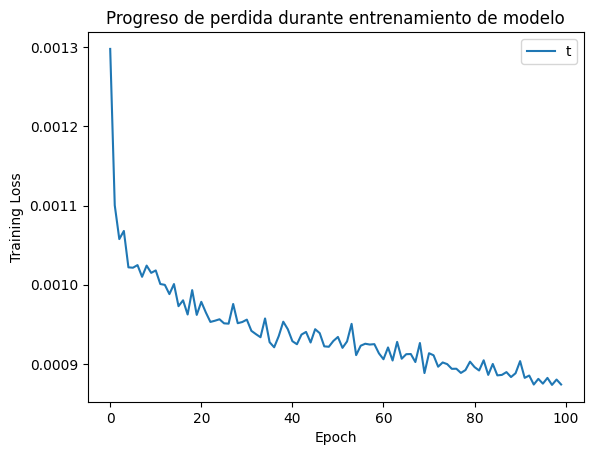

In [142]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progreso de perdida durante entrenamiento de modelo')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('training Loss')

Prediccion
Definimos el hogar con sus respectivas entradas / inputs
'bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement'

In [143]:
X_test_1 = np.array([[4,3,1960,5000,1,2000,3000]])

In [144]:

X_test_scaled_1 = scaler_x.transform(X_test_1)

c:\Users\Nico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Haciendo prediccion

In [145]:
y_predict_1_scaled = model.predict(X_test_scaled_1)
print(y_predict_1_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.10519179]]


Desescalamos el resultado

In [146]:
y_predict_1_scaled = scaler_y.inverse_transform(y_predict_1_scaled)
print(y_predict_1_scaled)

[[877087.4]]
